# **E-Waste Classification Project (Preprocessing)**

##Loading Dataset From ZipFile


In [ ]:
import pandas as pd
import zipfile
import os

#extracting zipfile
zip_path="/content/archive (1).zip"
extract_path="/content/ex_files"

with zipfile.ZipFile(zip_path,"r") as zip_ref:
  zip_ref.extractall(extract_path)

#listing the directory
os.listdir(extract_path)

['modified-dataset']

## understanding structure of directories


In [ ]:
#traversing all directories and printing directory structure in zipfile whhich is extracted into extract_path
for root, dirs, files in os.walk(extract_path):
    print(f"Directory: {root}, Subfolders: {dirs}, Files: {len(files)}")


Directory: /content/ex_files, Subfolders: ['modified-dataset'], Files: 0
Directory: /content/ex_files/modified-dataset, Subfolders: ['train', 'test', 'val'], Files: 0
Directory: /content/ex_files/modified-dataset/train, Subfolders: ['Mobile', 'Microwave', 'Keyboard', 'Player', 'Television', 'Printer', 'Washing Machine', 'PCB', 'Mouse', 'Battery'], Files: 0
Directory: /content/ex_files/modified-dataset/train/Mobile, Subfolders: [], Files: 240
Directory: /content/ex_files/modified-dataset/train/Microwave, Subfolders: [], Files: 240
Directory: /content/ex_files/modified-dataset/train/Keyboard, Subfolders: [], Files: 240
Directory: /content/ex_files/modified-dataset/train/Player, Subfolders: [], Files: 240
Directory: /content/ex_files/modified-dataset/train/Television, Subfolders: [], Files: 240
Directory: /content/ex_files/modified-dataset/train/Printer, Subfolders: [], Files: 240
Directory: /content/ex_files/modified-dataset/train/Washing Machine, Subfolders: [], Files: 240
Directory: /c

## Traversing and checking if all folders have equal  number of images in order to reduce bias towards a class in classification of E-Waste.

In [ ]:
from collections import defaultdict
class_count=defaultdict(int)
for root, dirs, files in os.walk(extract_path):
 for file in files:
  if file.lower().endswith((".jpg",",png",".jpeg")):
    label=os.path.basename(root)
    class_count[label] += 1

print(dict(class_count))

{'Mobile': 300, 'Microwave': 300, 'Keyboard': 300, 'Player': 300, 'Television': 300, 'Printer': 300, 'Washing Machine': 300, 'PCB': 300, 'Mouse': 300, 'Battery': 300}


## Displaying Sample Images

Displaying sample images for class: Mobile


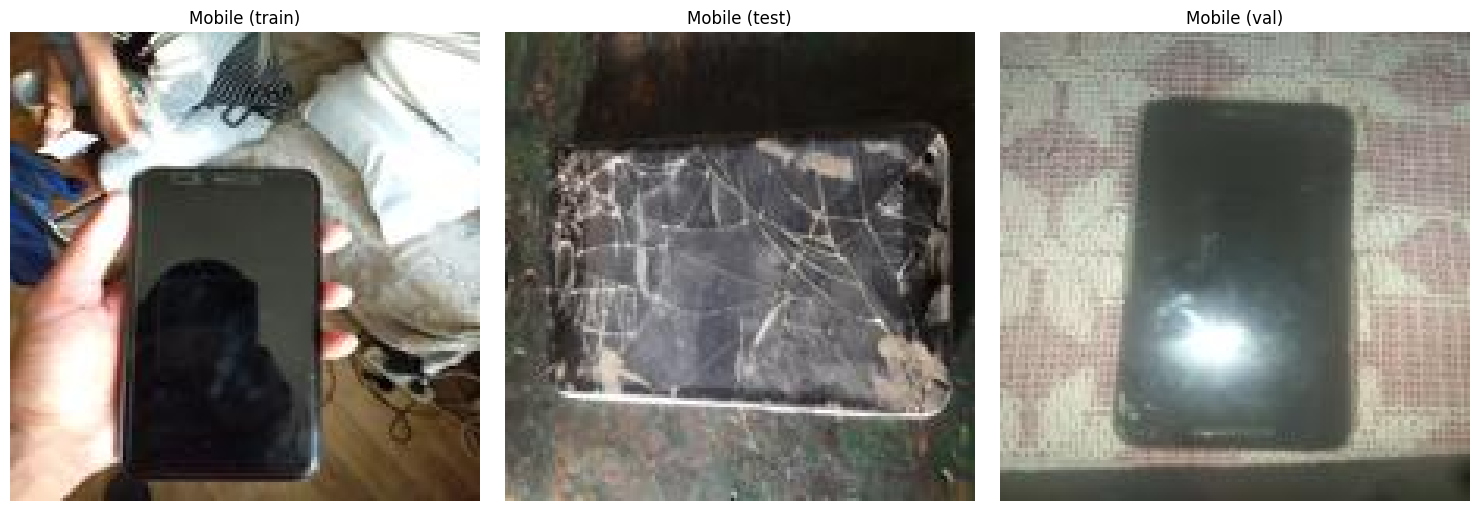

Displaying sample images for class: Microwave


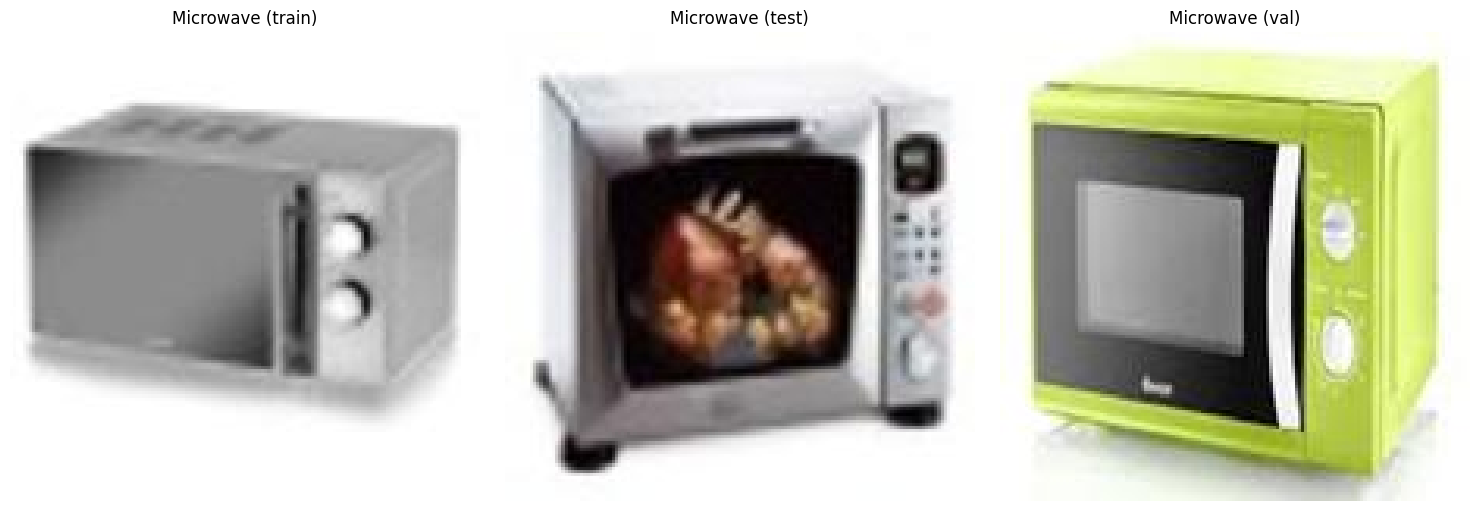

Displaying sample images for class: Keyboard


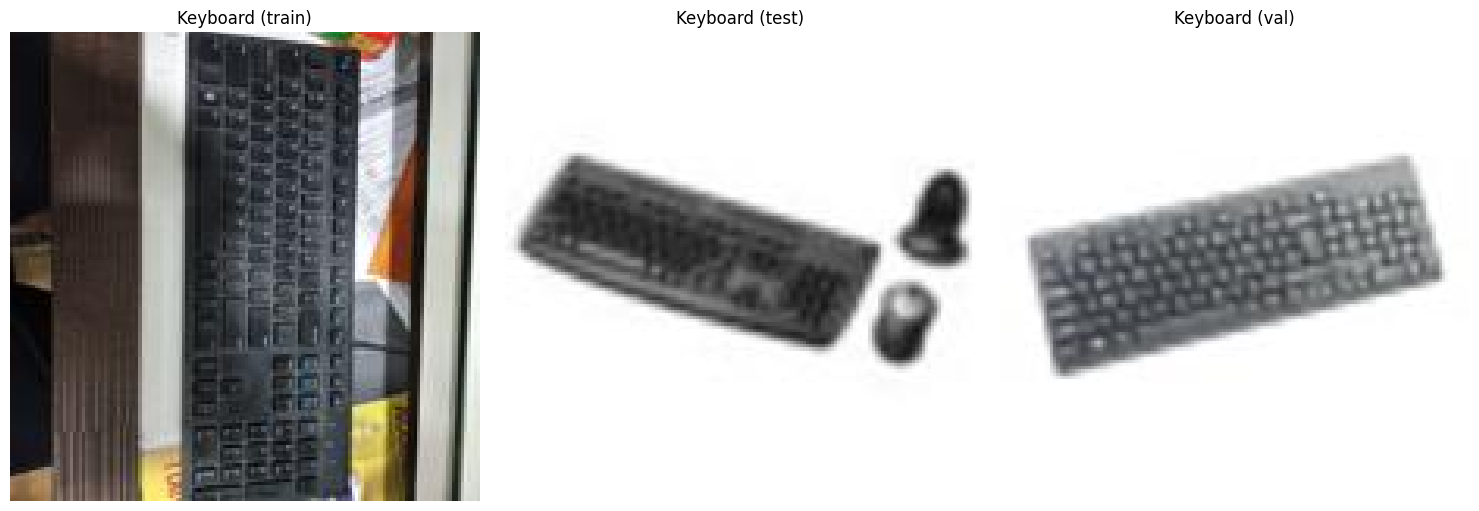

Displaying sample images for class: Player


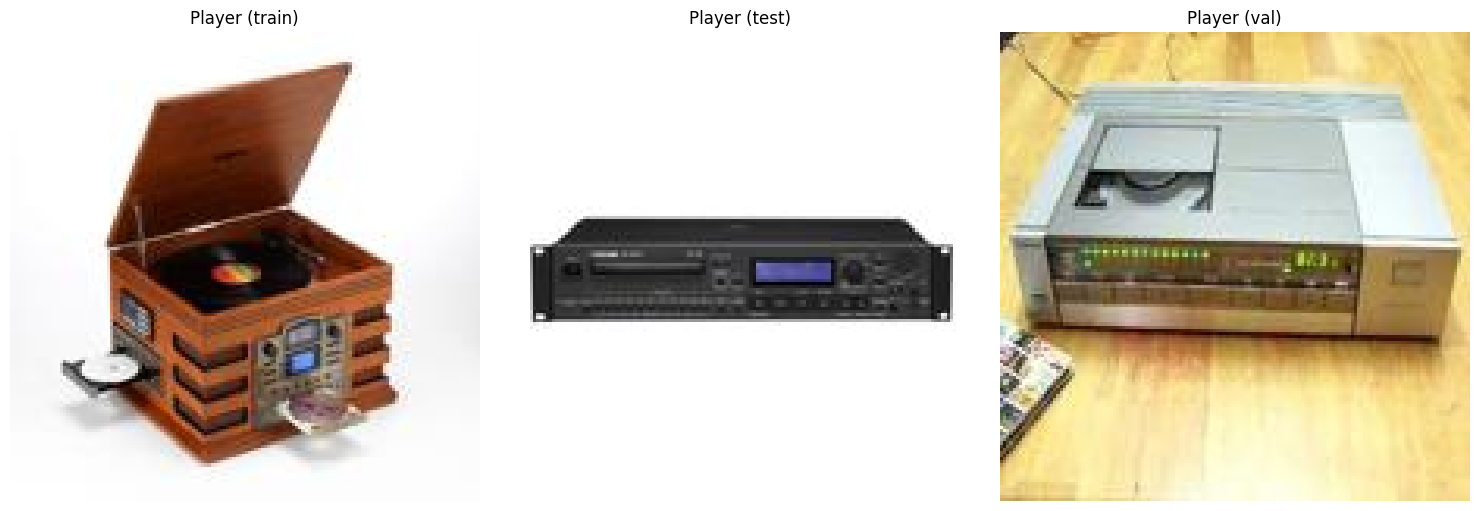

Displaying sample images for class: Television


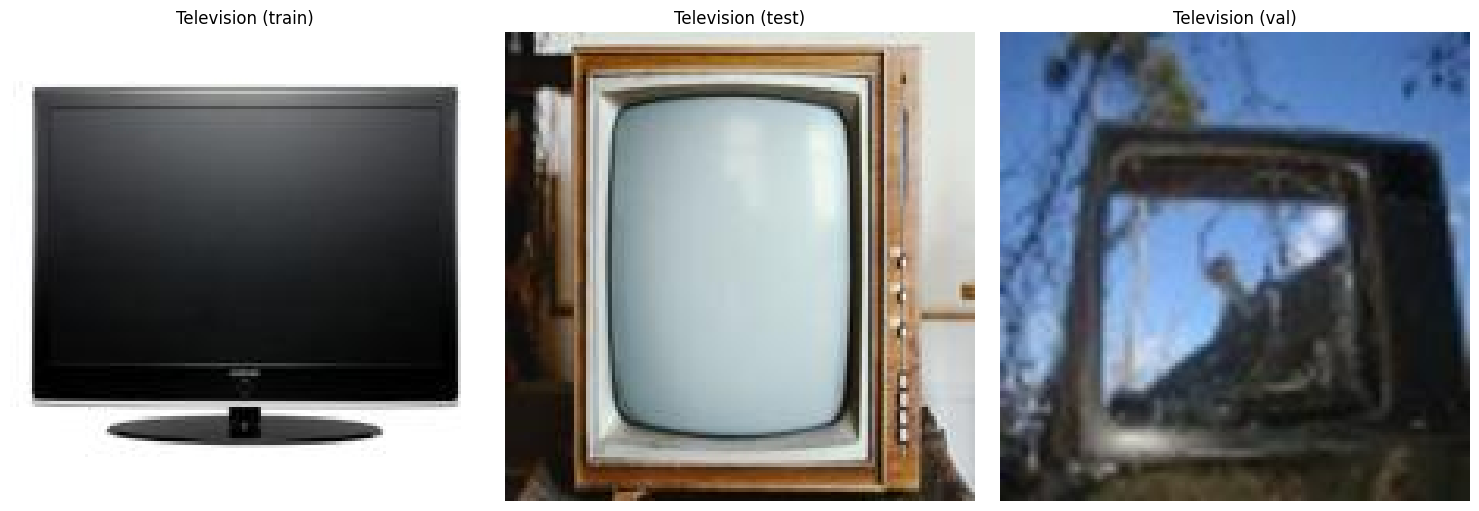

Displaying sample images for class: Printer


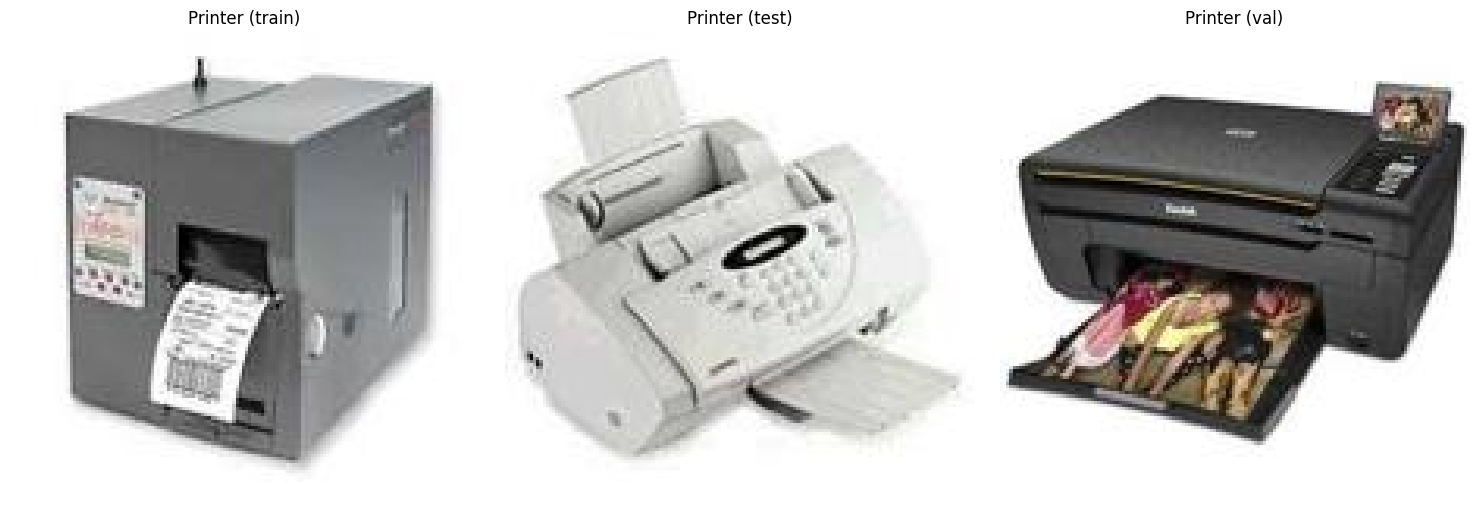

Displaying sample images for class: Washing Machine


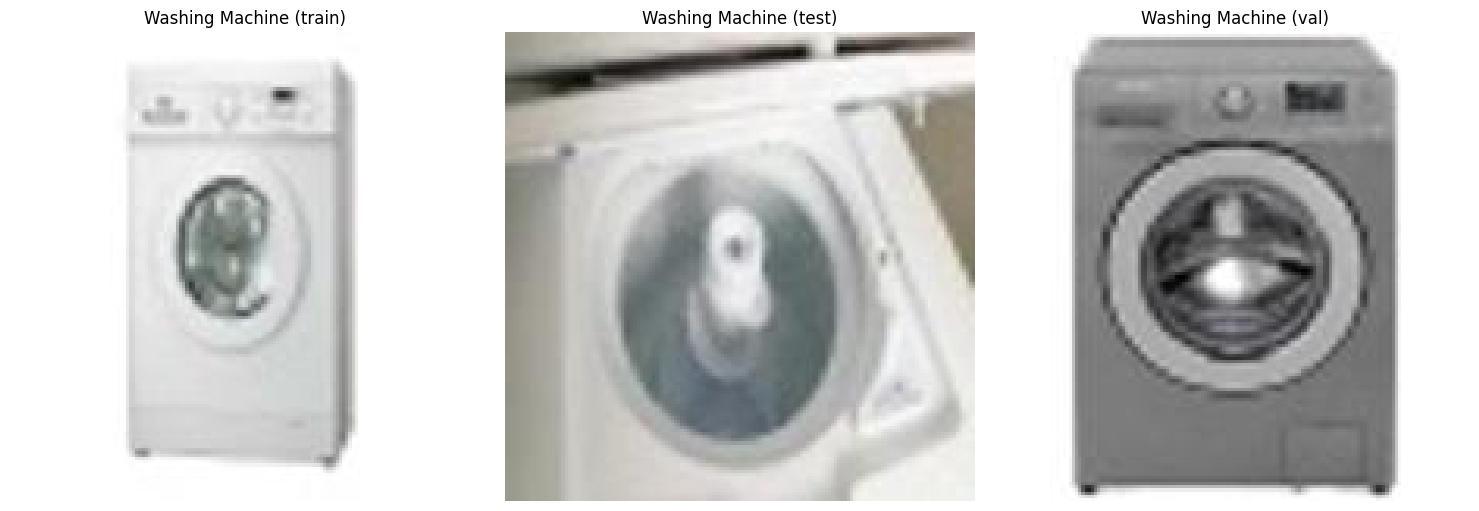

Displaying sample images for class: PCB


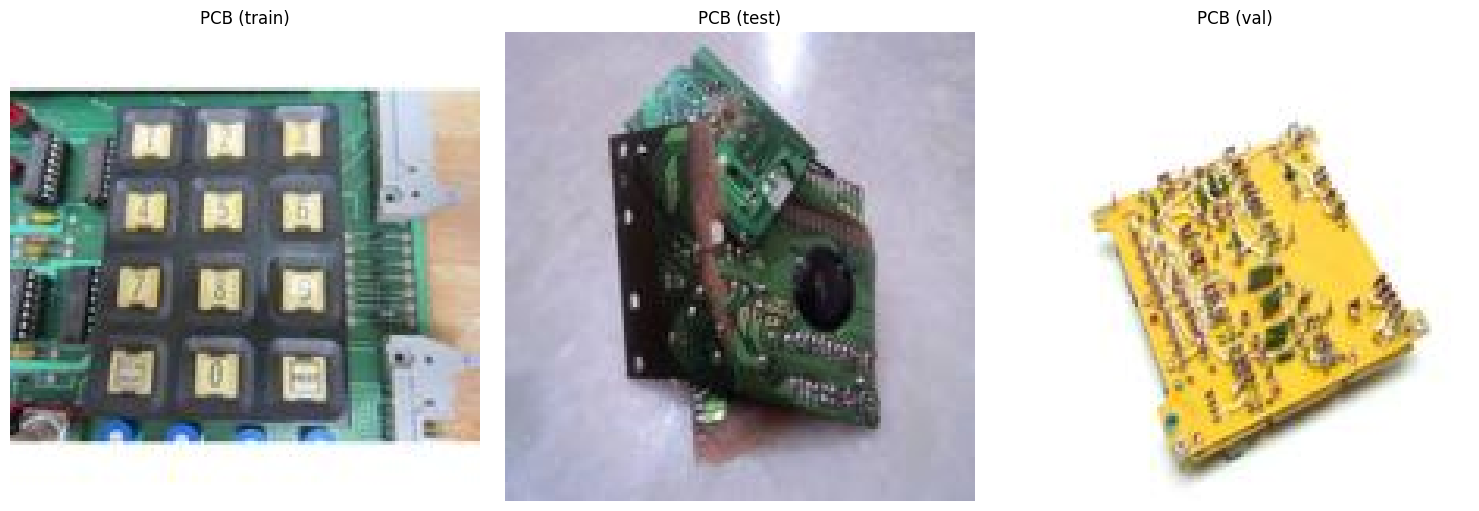

Displaying sample images for class: Mouse


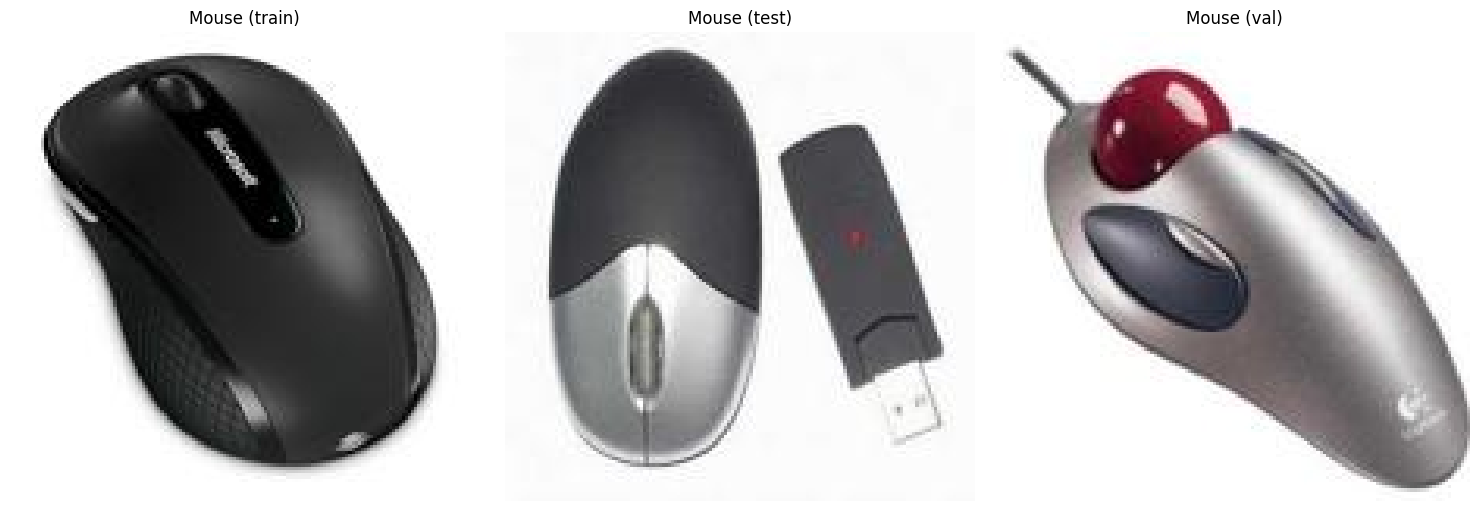

Displaying sample images for class: Battery


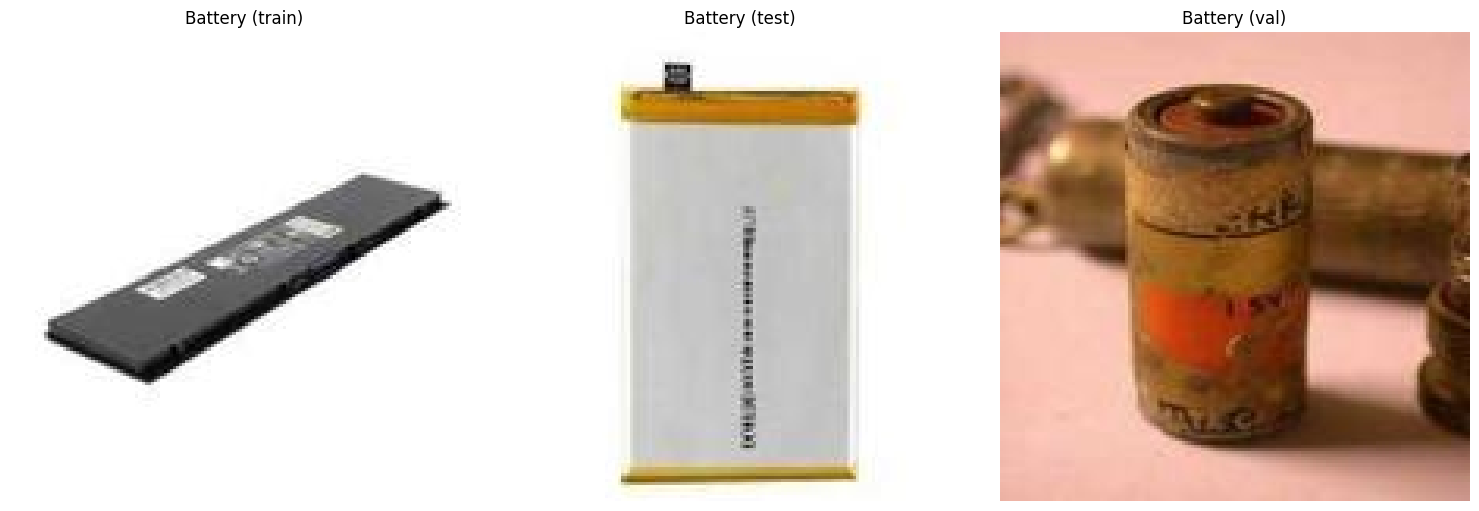

In [50]:
import matplotlib.pyplot as plt
import cv2
import os

def show_sample_images(folder, splits=['train', 'test', 'val'], num_images_per_class=1):

    for class_folder_name in os.listdir(os.path.join(folder, 'modified-dataset', splits[0])):
        print(f"Displaying sample images for class: {class_folder_name}")
        fig, axes = plt.subplots(1, len(splits), figsize=(5 * len(splits), 5))

        for i, split in enumerate(splits):
            split_folder = os.path.join(folder, 'modified-dataset', split)
            class_path = os.path.join(split_folder, class_folder_name)

            if not os.path.exists(class_path):
                print(f"Error: '{class_path}' not found.")
                continue

            image_paths = []
            for root, dirs, files in os.walk(class_path):
                for file in files:
                    if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                        image_paths.append(os.path.join(root, file))
                        if len(image_paths) == num_images_per_class:
                            break
                if len(image_paths) == num_images_per_class:
                    break

            if not image_paths:
                print(f"No image files found in {class_path}")
                continue

            for path in image_paths:
                img = cv2.imread(path)
                # Checking if image loading was successful
                if img is None:
                    print(f"Warning: Could not load image at {path}")
                    continue
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                axes[i].imshow(img_rgb)
                axes[i].set_title(f"{class_folder_name} ({split})")
                axes[i].axis('off')

        plt.tight_layout()
        plt.show()

show_sample_images(extract_path, splits=['train', 'test', 'val'], num_images_per_class=1)

##Resizing Images for effective classification

In [46]:
#RESIZING TO EQUALIZE DIMENSION
target_size=1024
op_dir='/content/ex_files/resized_dataset'
dataset_dir="/content/ex_files/modified-dataset"

In [47]:
splits = ['train', 'test', 'val']
for split in splits:
  split_dir = os.path.join(dataset_dir,  split)
  for class_name in os.listdir(split_dir):
    op_class_dir=os.path.join(op_dir,split,class_name)
    os.makedirs(op_class_dir,exist_ok=True)

In [48]:
for split in splits:
  split_dir=os.path.join(dataset_dir,split)
  if not os.path.exists(split_dir):
    print(f"Warning: Split directory not found at {split_dir}")
    continue

  for class_name in os.listdir(split_dir):
    class_dir=os.path.join(split_dir,class_name)
    if not os.path.isdir(class_dir):
      continue

    op_class_dir=os.path.join(op_dir,split,class_name)

    for filename in os.listdir(class_dir):
      img_path=os.path.join(class_dir, filename)
      if os.path.isfile(img_path) and filename.lower().endswith(('.jpg','.jpeg','.png')):
        try:
          img=cv2.imread(img_path)

          #Resizing
          if img is not None:
            resized_img=cv2.resize(img,(target_size,target_size))

            #op path
            op_path=os.path.join(op_class_dir,filename)

            #saving
            cv2.imwrite(op_path,resized_img)

          else:
            print(f"Oops! could not find Image:{img_path}")
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

print("Resizing complete!")

Resizing complete!


##Displaying resized Images

Displaying sample images for class: Mobile from resized dataset


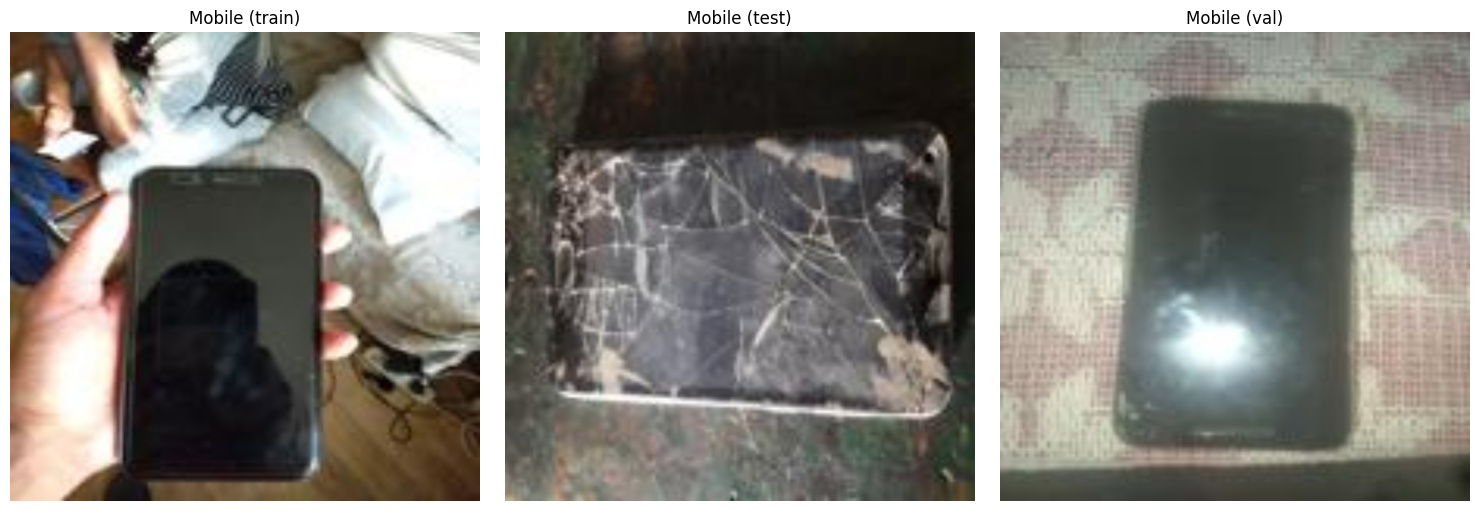

Displaying sample images for class: Microwave from resized dataset


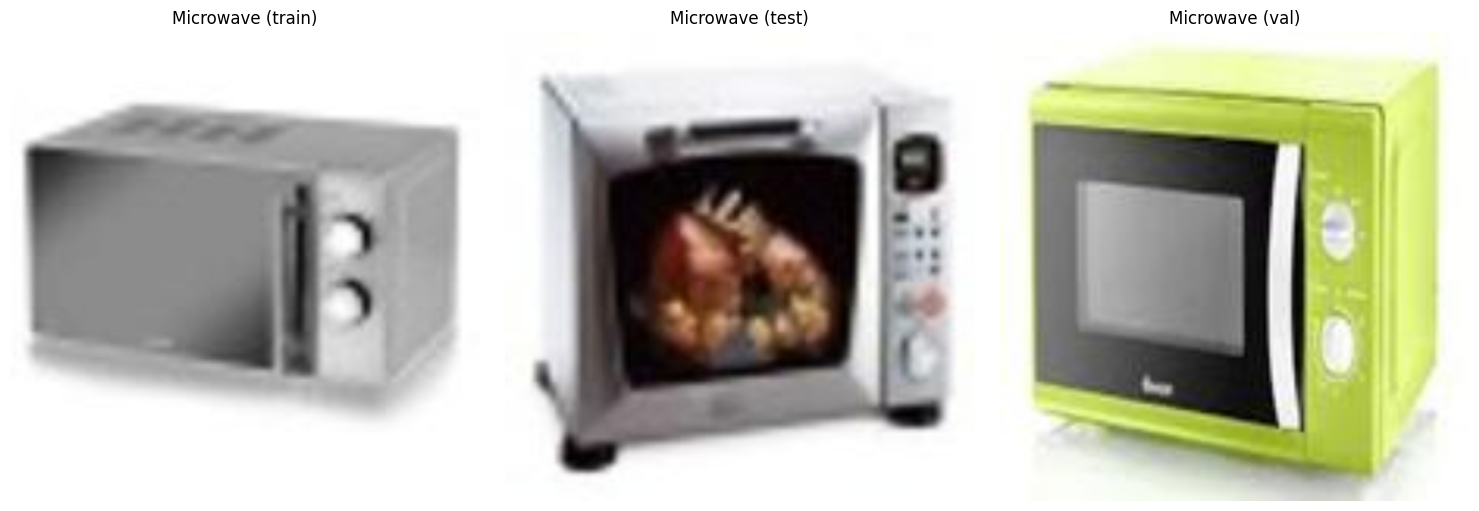

Displaying sample images for class: Keyboard from resized dataset


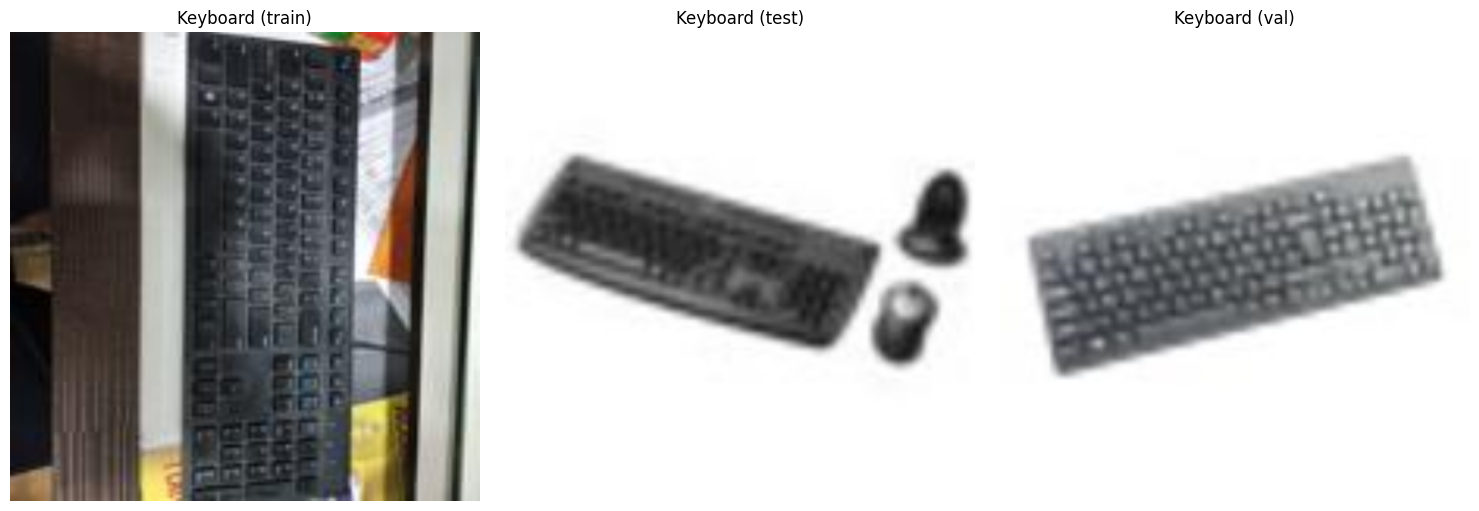

Displaying sample images for class: Player from resized dataset


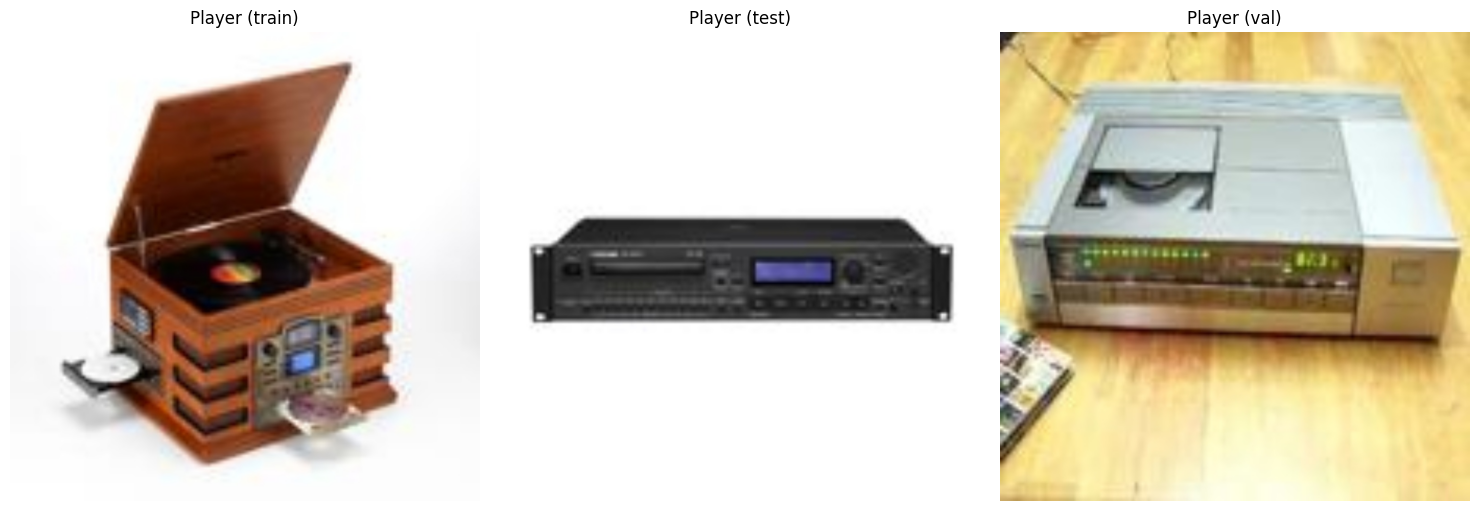

Displaying sample images for class: Television from resized dataset


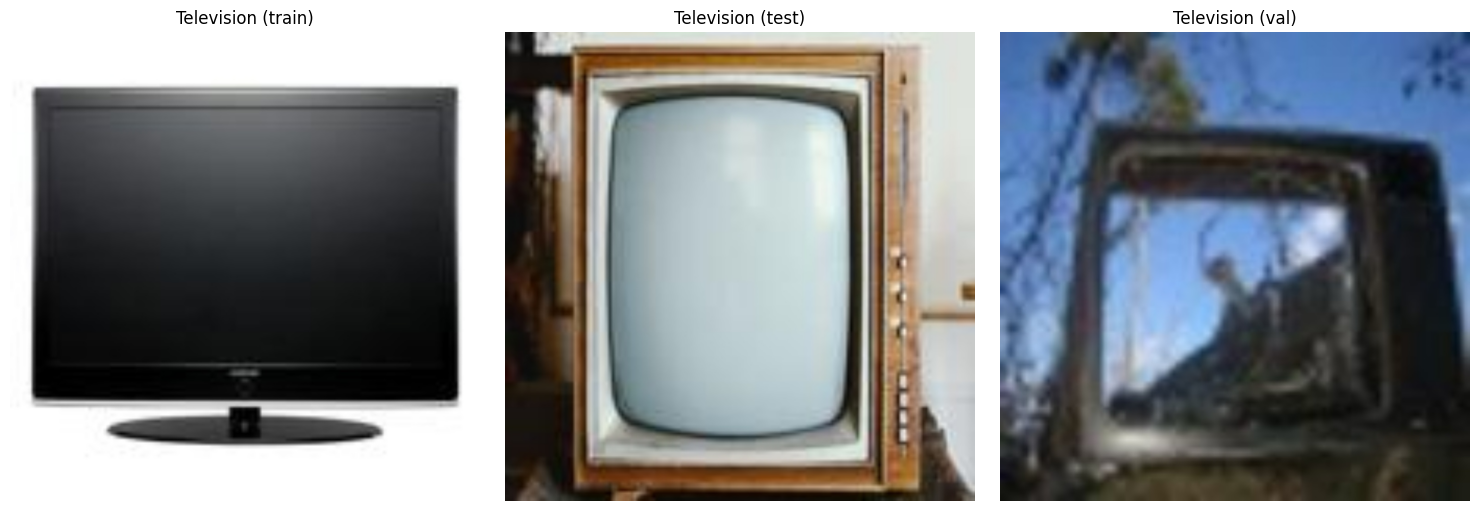

Displaying sample images for class: Printer from resized dataset


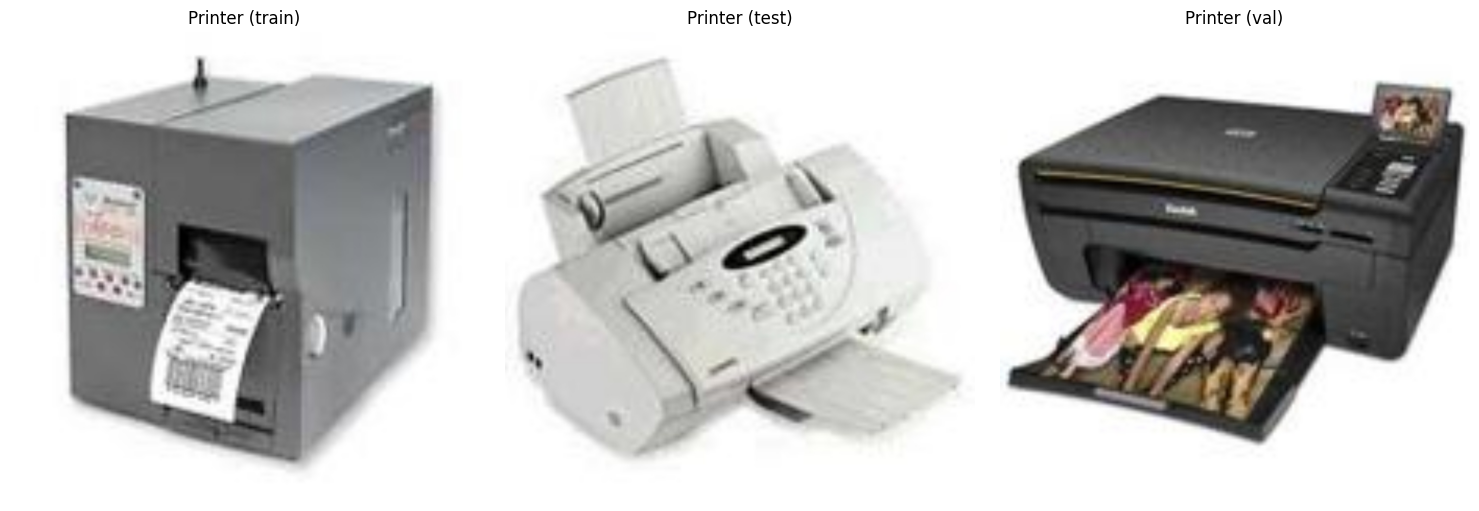

Displaying sample images for class: Washing Machine from resized dataset


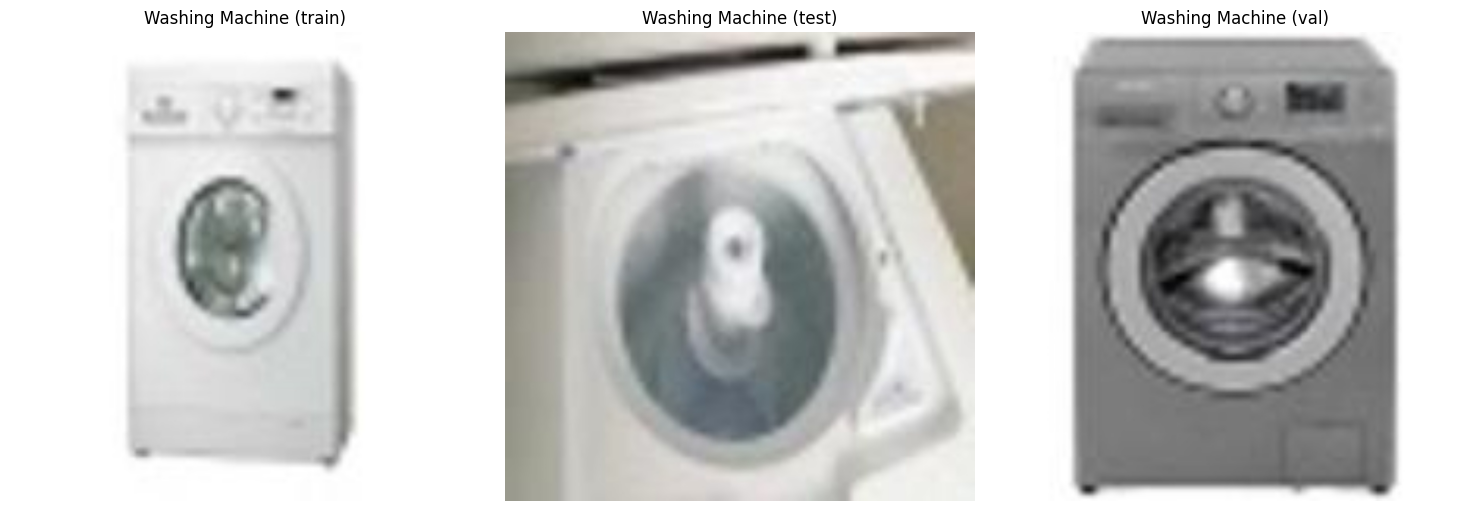

Displaying sample images for class: PCB from resized dataset


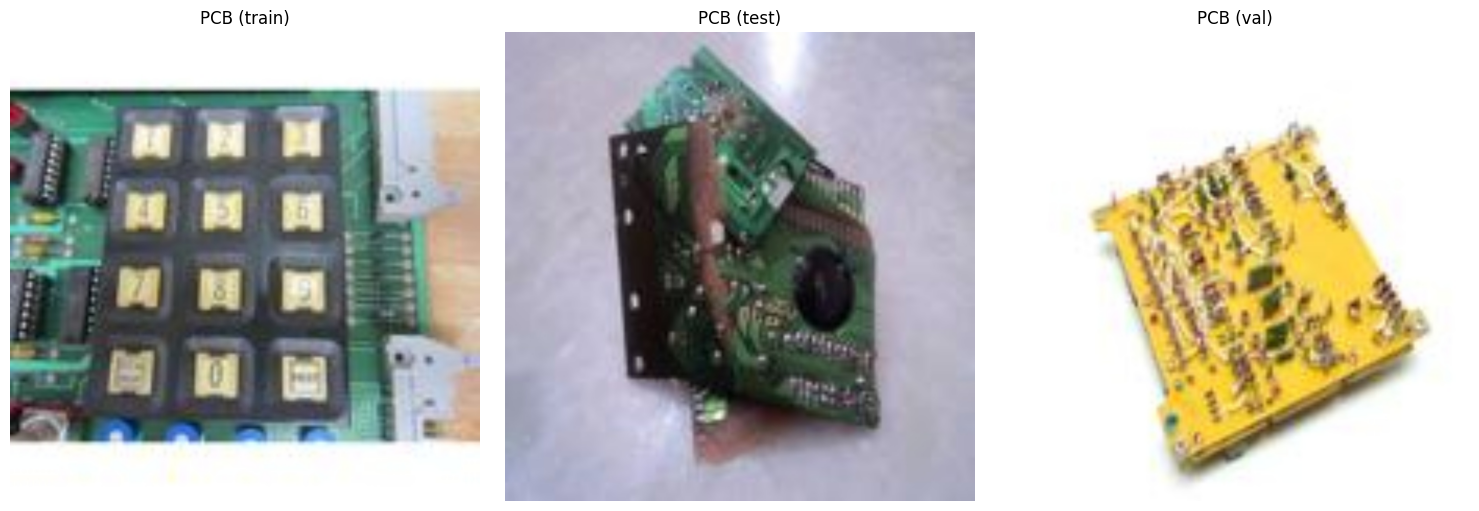

Displaying sample images for class: Mouse from resized dataset


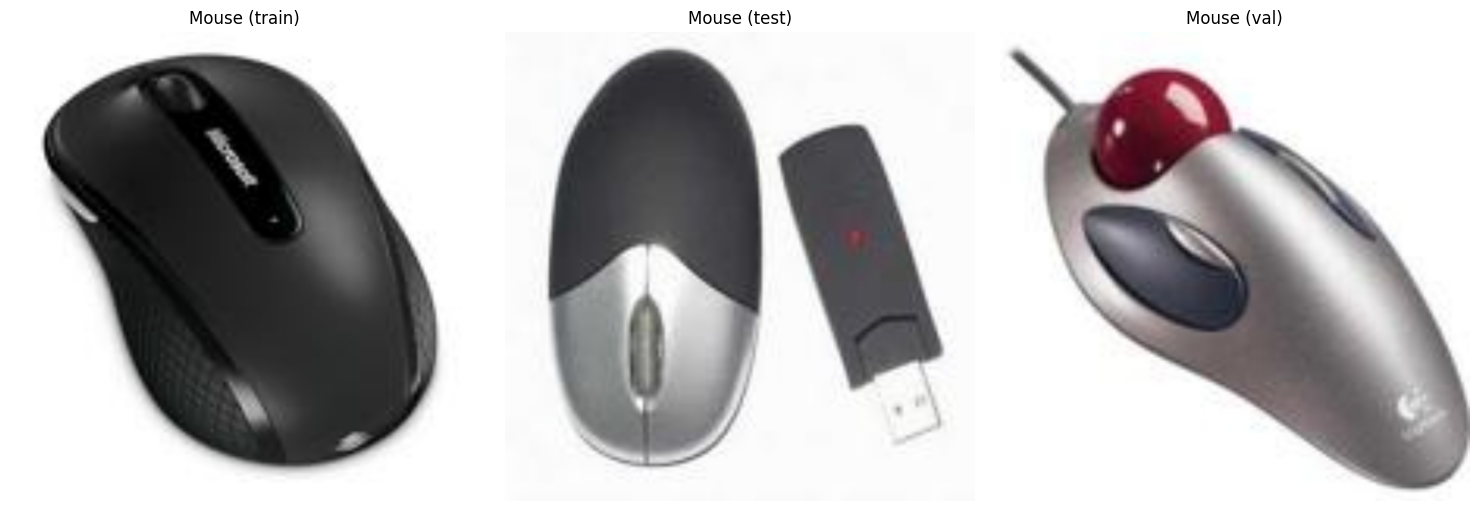

Displaying sample images for class: Battery from resized dataset


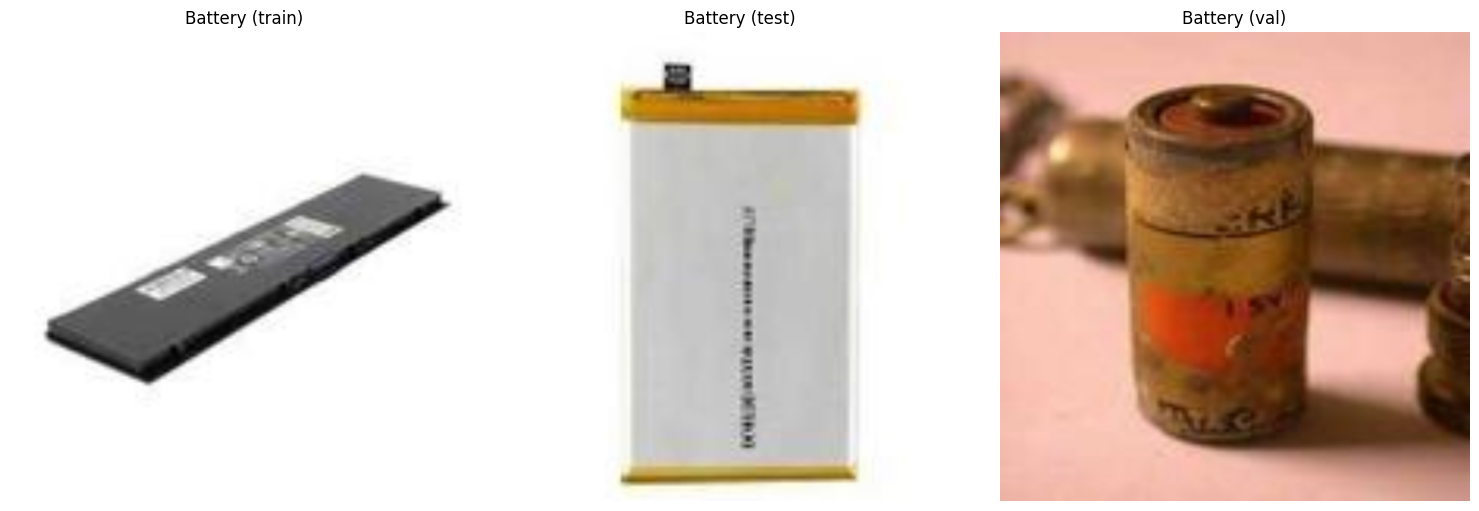

In [49]:
import matplotlib.pyplot as plt
import cv2
import os

def show_sample_images(folder, splits=['train', 'test', 'val'], num_images_per_class=1, dataset_type='original'):

    if dataset_type == 'original':
        dataset_path = os.path.join(folder, 'modified-dataset')
    elif dataset_type == 'resized':
        dataset_path = os.path.join(folder, 'resized_dataset')
    else:
        print("Invalid dataset_type. Please use 'original' or 'resized'.")
        return

    for class_folder_name in os.listdir(os.path.join(dataset_path, splits[0])): # Assuming all splits have the same classes
        print(f"Displaying sample images for class: {class_folder_name} from {dataset_type} dataset")
        fig, axes = plt.subplots(1, len(splits), figsize=(5 * len(splits), 5)) # Create subplots for each split

        for i, split in enumerate(splits):
            split_folder = os.path.join(dataset_path, split)
            class_path = os.path.join(split_folder, class_folder_name)

            if not os.path.exists(class_path):
                print(f"Error: '{class_path}' not found.")
                continue

            image_paths = []
            for root, dirs, files in os.walk(class_path):
                for file in files:
                    if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                        image_paths.append(os.path.join(root, file))
                        if len(image_paths) == num_images_per_class:
                            break
                if len(image_paths) == num_images_per_class:
                    break


            if not image_paths:
                print(f"No image files found in {class_path}")
                continue

            for path in image_paths:
                img = cv2.imread(path)
                # Checking if image loading was successful
                if img is None:
                    print(f"Warning: Could not load image at {path}")
                    continue
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                axes[i].imshow(img_rgb)
                axes[i].set_title(f"{class_folder_name} ({split})")
                axes[i].axis('off')

        plt.tight_layout()
        plt.show()

# Call the function to show images from the 'train', 'test', and 'val' sets of the resized dataset
show_sample_images(extract_path, splits=['train', 'test', 'val'], num_images_per_class=1, dataset_type='resized')